<div class="alert alert-block alert-info">

    
# Saas Fee Gravitational Wave School: Formation channels of Gravitational Waves (GWs)
    
In this jupyter notebook we will walk through and re-create some of the figures from https://arxiv.org/pdf/2010.00002.pdf on **Chemically Homogeneous Evolution** by Jeff Riley. A PDF of this paper can be found in the directory under the name CHE_paper.pdf. <br>



Notebook by Floor Broekgaarden, Jeff Riley and Ilya Mandel <br>
<br>

The original data can be found on Zenodo https://zenodo.org/record/5595426 <br>
For this tutorial we have downloaded COMPAS_Output.h5 from the auhtor's dataset and slightly reduced the datafile (removed the Common Envelope information) and rewritten the file to COMPAS_Output_reduced.h5. 

___




<div class="alert alert-block alert-warning">

Throughout this notebook and in class we will use several acronyms and definitions listed below    
    
    
    
### Definitions: 
    
    
 - CHE: Chemically Homogeneous Evolution, 
 - GW: Gravitational Waves 
 - DCO: Double Compact Object 
 - BH: Black Hole
 - NS: Neutron Star
 - Primary: in this notebook always refers to the star that was most massive at the zero age main sequence (ZAMS)
 - Secondary: in this notebook always refers to the star that was least massive at the zero age main sequence (ZAMS)
 - ZAMS: Zero Age Main Sequence: this is in COMPAS where stars start their lives. 
    

In [1]:
# first we will import some of the packages that we will use 
import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt

# we will use astropy for some useful constants and units 
from astropy import units as u
from astropy import constants as const
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)


In [2]:

# add path to where the COMPASOutput.h5 file is stored. 
# For you the part '/Volumes/Andromeda/SAAS-FEE_CHE/' is probably different
path = '/Volumes/Andromeda/SAAS-FEE_CHE/COMPAS_Output_reduced.h5' # change this line! 

# the following line reads in the data 
fdata = h5.File(path, 'r')
list(fdata.keys())  # print the different files within the hdf5 folder: 



# to close the file you will have to use fdata.close()


['DoubleCompactObjects', 'Supernovae', 'SystemParameters']

<div class="alert alert-block alert-success"> 



the files above 'DoubleCompactObjects', 'Supernovae', 'SystemParameters' store the properties of the simulated binaries at the stages of the 'commen enevelope' (in case there is one), the moment of double object formation, the moment of the supernova, and the initial conditions (at the zero-age main sequence).

#### We can view what parameters are stored by again using the command .keys()
    
    
</div>

In [3]:
print(list(fdata['DoubleCompactObjects'].keys()))

print()

print(list(fdata['SystemParameters'].keys()))

print()

print(list(fdata['Supernovae'].keys()))

['Coalescence_Time', 'Eccentricity@DCO', 'MT_Case_1', 'MT_Case_2', 'Mass_1', 'Mass_2', 'Merges_Hubble_Time', 'Recycled_NS_1', 'Recycled_NS_2', 'SEED', 'Separation@DCO', 'Stellar_Type_1', 'Stellar_Type_2', 'Time']

['CE_Alpha', 'CH_on_MS_1', 'CH_on_MS_2', 'Eccentricity@ZAMS', 'Equilibrated', 'Equilibrated_At_Birth', 'Error', 'Experienced_RLOF_1', 'Experienced_RLOF_2', 'Experienced_SN_Type_1', 'Experienced_SN_Type_2', 'LBV_Multiplier', 'LBV_Phase_Flag_1', 'LBV_Phase_Flag_2', 'Mass@ZAMS_1', 'Mass@ZAMS_2', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS_1', 'Metallicity@ZAMS_2', 'Omega@ZAMS_1', 'Omega@ZAMS_2', 'SEED', 'SN_Kick_Magnitude_Random_Number_1', 'SN_Kick_Magnitude_Random_Number_2', 'SN_Kick_Mean_Anomaly_1', 'SN_Kick_Mean_Anomaly_2', 'SN_Kick_Phi_1', 'SN_Kick_Phi_2', 'SN_Kick_Theta_1', 'SN_Kick_Theta_2', 'Separation@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type@ZAMS_1', 'Stellar_Type@ZAMS_2', 'Stellar_Type_1', 'Stellar_Type_2'

<div class="alert alert-block alert-success"> 

#### The meaning of all parameters and files are described here https://compas.readthedocs.io/en/latest/pages/User%20guide/COMPAS%20output/standard-logfiles.html


Now that we have the data, we can do some data investigation. Here is an example of how to read the "SEED" parameter, which is a unique number for each binary that is run. 
    
<div>

In [4]:
SEED_DCO = fdata['DoubleCompactObjects']["SEED"][...].squeeze()
print(SEED_DCO)

[  400047   400065   400101 ... 11599854 11599926 11599965]


<div class="alert alert-block alert-warning">

## Question 1
#### - a: check and write down the number of rows (entries) of each of the dataset groups, 'DoubleCompactObjects', 'Supernovae', 'SystemParameters'. <br>
    
#### - b: If the lengths of the rows are different why is this so? And does it make sense which group has the most/least rows?  <br>

*Hint*: you might want to look at table 1 in the paper CHE_paper.pdf and the descriptions at https://compas.readthedocs.io/en/latest/pages/User%20guide/COMPAS%20output/standard-logfiles.html
    
#### - c: Why is the number of rows in 'DoubleCompactObjects' not the same as the total number of 'BBHs formed' in Table 1 from this paper?

<div class="alert alert-block alert-danger"> 
    
## Answer 1: 
    
    
Below are a few methods shown to print the number of rows (but there are many ways to do this). <br>
We find that DoubleCompactObjects has 291253 rows, SystemParameters has 12000000 number of rows and the group Supernovae has 6213168 number of rows. <br>
    
    
 - The systemparameters is easiest to understand: this file prints one line (row) for each binary that the author simulated in COMPAS. You can read in the paper or see in Table 1 (under "Number of binaries evolved" and then the "total" column) that this is exactly 12 million. Which is indeed the same as the number of rows in the dataset. <br>
    
  
    
 - Second we have the group 'DoubleCompactObjects', this is the dataset that prints the properties at the moment a double compact object binary (DCO) is formed. This is a rare occurance in our simulations (even if we only model massive stars). And so the number of rows/entries in this file is much much smaller and reduced to only 291253 (almost 300 000) which is the outcome of about ~2.4% of the all simulated systems. You can see that this number is close to, but slightly larger than the 261,741 "Total" BBHs formed in Table 1 of the paper. This is because the 'DoubleCompactObjects' file also contains NS+NS and BH+NS mergers on top of the BH+BH mergers, whereas the table only quotes the number of BH+BH mergers residing in the data. <br>

    
 - Last, the 'Supernovae' file prints the properties of the binary whenever in the simulation a supernova occurs. 
This is a tricky one to explain. There are 2 supernova that occur to form a DCO system, so you expect this file to always be larger than 2x the double compact object file. On the other hand, of the stars that do not form a DCO system, many either merge as stars, or disrupt during the first SN, in which case the simulation stops following the evolution of the binary and future SNe are not printed. <br>
    

In [5]:
# Method 1, based on the example above


# all three groups contain the parameter "SEED", so we can use this to print the lengths
for group in ['DoubleCompactObjects', 'SystemParameters', 'Supernovae']:
    SEED = fdata[group]["SEED"][...].squeeze()
    print('group %s has %s number of rows'%(group, len(SEED)))

group DoubleCompactObjects has 291253 number of rows
group SystemParameters has 12000000 number of rows
group Supernovae has 6213168 number of rows


In [6]:
# Method 2: Or even shorter: 

# all three groups contain the parameter "SEED", so we can use this to print the lengths
for group in ['DoubleCompactObjects', 'SystemParameters', 'Supernovae']:
    print('group %s has %s number of rows'%(group, fdata[group]["SEED"].len()))

group DoubleCompactObjects has 291253 number of rows
group SystemParameters has 12000000 number of rows
group Supernovae has 6213168 number of rows


In [7]:
# Method 3, writing everything out: 

lenDCO = len(fdata['DoubleCompactObjects']['SEED'][...].squeeze())
print('group DoubleCompactObjects has %s number of rows'%lenDCO)

lenSys = len(fdata['SystemParameters']['SEED'][...].squeeze())
print('group SystemParameters has %s number of rows'%lenSys)

lenSNe = len(fdata['Supernovae']['SEED'][...].squeeze())
print('group Supernovae has %s number of rows'%lenSNe)

group DoubleCompactObjects has 291253 number of rows
group SystemParameters has 12000000 number of rows
group Supernovae has 6213168 number of rows


<div class="alert alert-block alert-warning">

    
## Example 1: plotting BH masses 
___
below we show an example of how to obtain and plot the compact object masses in the dataset 



In [61]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax



In [62]:
fDCO      = fdata['DoubleCompactObjects']


M1 =  fDCO['Mass_1'][...].squeeze()  # mass in Msun of the compact object resulting from the *primary star*
M2 =  fDCO['Mass_2'][...].squeeze()  # mass in Msun of the compact object resulting from the *secondary star*



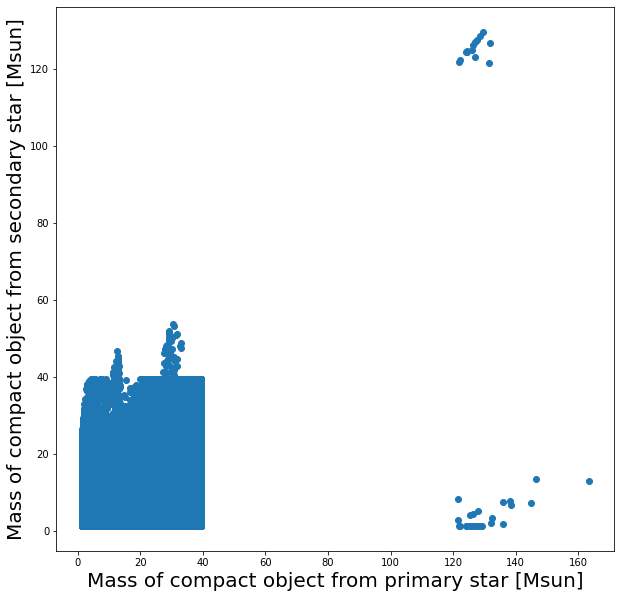

In [63]:
f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

plt.scatter(M1, M2)
plt.xlabel('Mass of compact object from primary star [Msun]', fontsize=20)
plt.ylabel('Mass of compact object from secondary star [Msun]', fontsize=20)
plt.show()

<div class="alert alert-block alert-warning">

### Question 2: 
    
 - a): can you explain some of the features in the plot above? E.g., where are the gaps, where are the most datapoints?
    
    
 - b): Are there any BH+NS or NS+NS in the dataset? If so, plot them
    
    
 - c): extra: how many BH+NS, vs. NS+NS vs. BH-BH systems are there? And what is the total? 

*Hint*: A NS in this COMPAS simulation is defined as a compact object with mass < 2.5 Msun 
                                                                                     
                                                                                     


<div class="alert alert-block alert-danger"> 
    
## Answer 2:
    
    
We first plot the NS-NS, NS-BH and BH-BH DCO systems in seperate plots below. 
    
For this we use the definition that a NS in COMPAS is always below < 2.5 Msun, and that this value thus indicates the boundary between NSs and BHs. This does not have to be true in nature (nature might actually have a slightly different value for this boundary, for which a lot of active research is being conducted). 

There are also many other ways to do this, including checking for the StellarType of the stars.                                                                 

## NS-NS



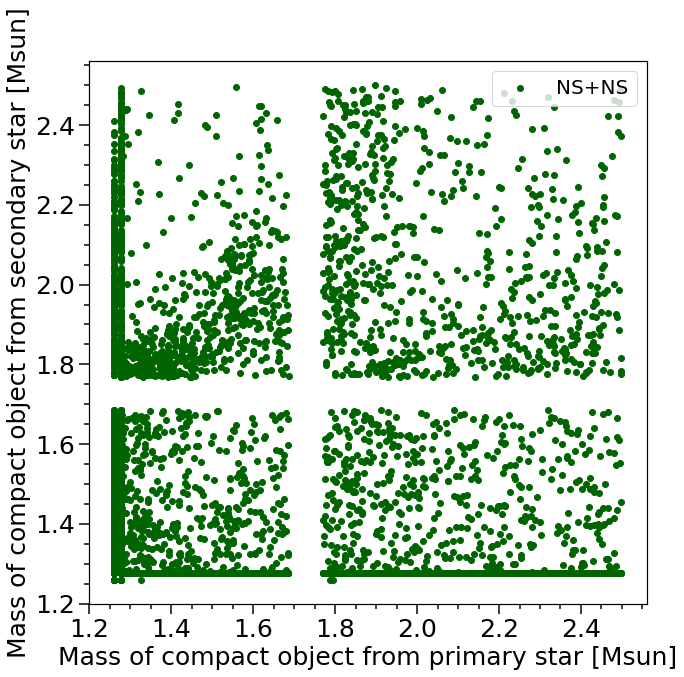

The total number of NS+NS systems in the dataset is 11248


In [11]:
f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

mask_M1isNS = (M1 <= 2.5) # M1 is a NS if mass is <= 2.5 Msun 
mask_M2isNS = (M2 <= 2.5) # M2 is a NS if mass is <= 2.5 Msun 

mask_NSNS = ((mask_M1isNS==1) & (mask_M2isNS==1)) 

plt.scatter(M1[mask_NSNS], M2[mask_NSNS], c='darkgreen', label='NS+NS')


layoutAxes(ax=ax, nameX='Mass of compact object from primary star [Msun]',\
           nameY='Mass of compact object from secondary star [Msun]')

plt.legend(fontsize=20)
plt.show()

print('The total number of NS+NS systems in the dataset is %s'%len(M1[mask_NSNS]))


<div class="alert alert-block alert-danger"> 


Features in the plot above: 

    
In the plot above we see that the NS-NS systems formed in COMPAS have masses between 1.2-2.5 solar masses. This is the neutron star mass range that is expected from the NS equation of state. 

I don't expect that most students will know this: 
There is a gap around 1.7 Msun. But this is an artifact from the SN remnant mass prescription used in COMPAS
There is a little bit of a pile up of NS systems around 1.25 solar masses. These systems come from electron capture supernovae and ultra-stripped supernovae. 

## BH-NS 

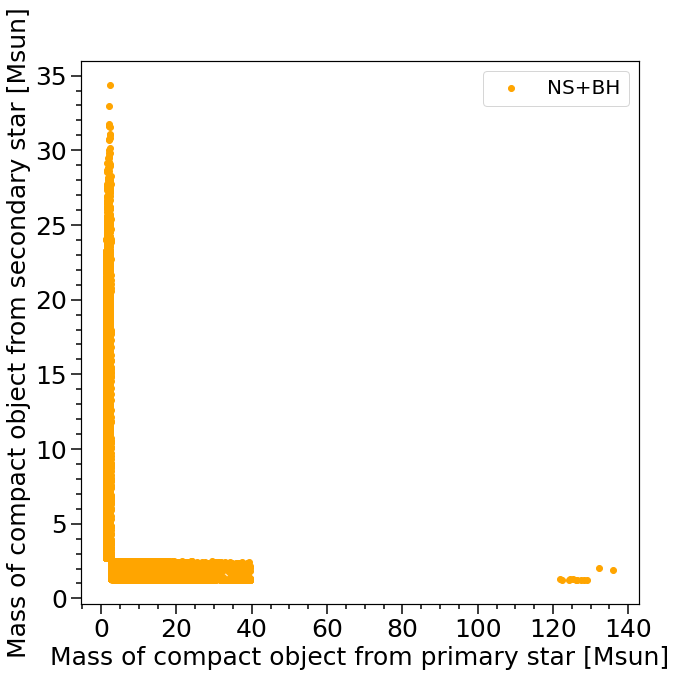

The total number of BH+NS systems in the dataset is 19383


In [84]:


f, ax= plt.subplots(1, 1,  figsize=(10,10)) 
mask_M1isNS = (M1 <= 2.5) # M1 is a NS if mass is <= 2.5 Msun 
mask_M2isNS = (M2 <= 2.5) # M2 is a NS if mass is <= 2.5 Msun 


mask_NSBH = ((mask_M1isNS==1) & (mask_M2isNS==0)) | ((mask_M1isNS==0) & (mask_M2isNS==1)) 


plt.scatter(M1[mask_NSBH], M2[mask_NSBH], c='orange', label='NS+BH')

layoutAxes(ax=ax, nameX='Mass of compact object from primary star [Msun]',\
           nameY='Mass of compact object from secondary star [Msun]')
plt.legend(fontsize=20)
plt.show()

print('The total number of BH+NS systems in the dataset is %s'%len(M1[mask_NSBH]))



<div class="alert alert-block alert-danger"> 


Features in the plot above: 

    
In the plot above we see that the BH-NS systems formed in COMPAS have NS masses between 1.2-2.5 solar masses. This is the neutron star mass range that is expected from the NS equation of state. The BHs are typically between 2.5 and 40 solar masses (but some extreme cases exist, but do not trust these too much). 

The gap between 40 and ~120 solar masses where no BHs form is a result from the pair-instability SN remnant mass gap. Where it is predicted that the Helium cores that form the BHs with masses in this gap undergo pair-instabillity and completely explode, not leaving behind any remnant. 

## BH-BH

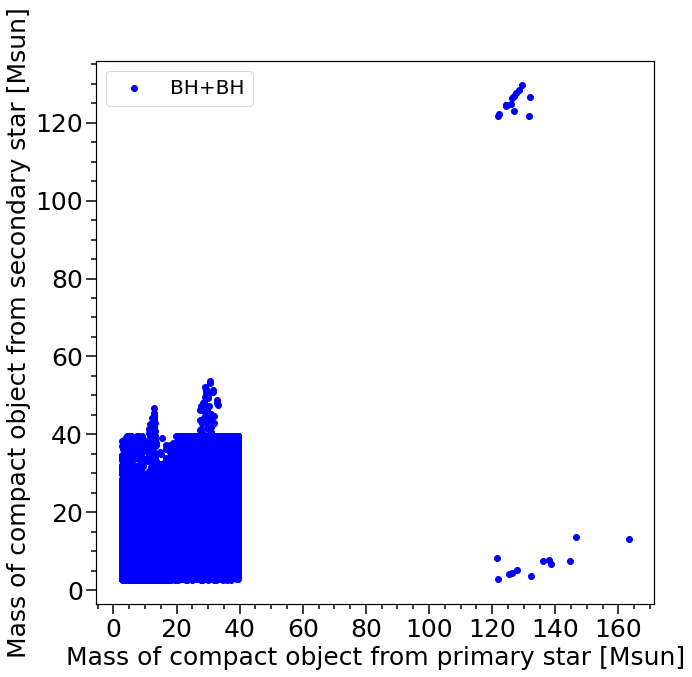

The total number of BH+BH systems in the dataset is 260622


In [64]:
# now the BH-BH systems: 

f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

mask_M1isNS = (M1 < 2.5) # M1 is a NS if mass is <= 2.5 Msun 
mask_M2isNS = (M2 < 2.5) # M2 is a NS if mass is <= 2.5 Msun 


Stellar_Type_1 = fDCO['Stellar_Type_1'][...].squeeze()
Stellar_Type_2 = fDCO['Stellar_Type_2'][...].squeeze()



mask_BHBH = ((mask_M1isNS==0) & (mask_M2isNS==0)) 


plt.scatter(M1[mask_BHBH], M2[mask_BHBH], c='blue', label='BH+BH')

layoutAxes(ax=ax, nameX='Mass of compact object from primary star [Msun]',\
           nameY='Mass of compact object from secondary star [Msun]')
plt.legend(fontsize=20)
plt.show()

print('The total number of BH+BH systems in the dataset is %s'%len(M1[mask_BHBH]))





<div class="alert alert-block alert-danger"> 


Features in the plot above: 

    
In the plot above we see that the BH-NS systems formed in COMPAS have NS masses between 1.2-2.5 solar masses. This is the neutron star mass range that is expected from the NS equation of state. The BHs are typically between 2.5 and 40 solar masses (but some extreme cases exist, but do not trust these too much). 

The gap between 40 and ~120 solar masses where no BHs form is a result from the pair-instability SN remnant mass gap. Where it is predicted that the Helium cores that form the BHs with masses in this gap undergo pair-instabillity and completely explode, not leaving behind any remnant. 

<div class="alert alert-block alert-danger"> 

    
    
There is a couple of interesting things to note: 
    
First of all the number of DCO systems are:
    BHBH: 260622
    BHNS: 19383 
    NSNS: 11248
    
BHBH are most common in te simulation, but that is partly due to the systems that have been evolved in COMPAS and the low metallicities. 
    
There are systems that undergo "mass ratio reversal", these are systems where the mass of the compact object from the secondary star at ZAMS (initially least massive star) ends up forming the most massive BH in the BBH system (top left systems). These systems have "reversed" the mass ratio at some point in their evolution (during one of the mass transfer phases). 




<div class="alert alert-block alert-warning">
    
### Question 3: 
    
    
 - a): Using the parameters in the 'DoubleCompactObjects' dataset and the example above, try to make a scatter plot of Total Mass (M1+M2) versus orbital Period of the BBH systems that merge within a Hubble time (13.7 Gyr) 
    
    Plot the period on the y-axis and the total mass on the x-axis. Plot the period in days. 
    
*Hint: You might want to use Kerpler's III law to complete the function below *
    
    
*Hint:* you will have to select BH+BH systems, and only systems that merge within a Hubble time 

In [ ]:

def separation_to_period_circular_case(separation=10*u.AU, M1=1*u.M_sun, M2=1*u.M_sun):
    """calculate Period from separation
    separation is separation of the binary (needs to be given in astropy units)
    M1 and M2 are masses of the binary
    This is based on Kepler's law, using a circular orbit
    
    """
    G = const.G # [gr cm s^2]
    
    ## use Kepler;s III law to calculate the period here 
    
    
    
    ###
    
    return period


<div class="alert alert-block alert-danger"> 
    
## Answer 3:
  
See the function below 
 

In [66]:
def separation_to_period_circular_case(separation=10*u.AU, M1=1*u.M_sun, M2=1*u.M_sun):
    """calculate Period from separation
    separation is separation of the binary (needs to be given in astropy units)
    M1 and M2 are masses of the binary
    This is based on Kepler's law, using a circular orbit
    
    """
    G = const.G # [gr cm s^2]
    

    mu = G*(M1+M2)
    period = 2*np.pi * np.sqrt(separation**3/mu)
    
    return period



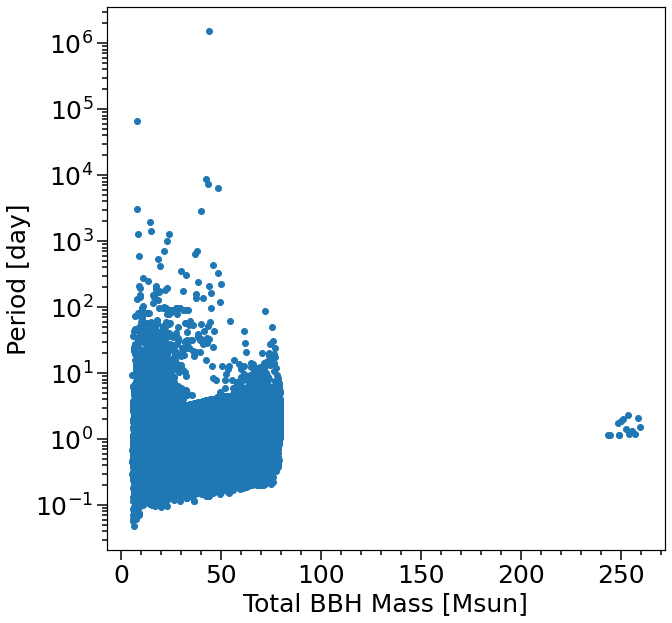

In [67]:

mask_M1isNS = (M1 <= 2.5) # M1 is a NS if mass is <= 2.5 Msun 
mask_M2isNS = (M2 <= 2.5) # M2 is a NS if mass is <= 2.5 Msun 
mask_BHBH = ((mask_M1isNS==0) & (mask_M2isNS==0))  # if true then the system is a BHBH

separation =  fDCO['Separation@DCO'][...].squeeze() # in AU 
Period = separation_to_period_circular_case(separation*u.au, M1*u.M_sun, M2*u.M_sun)
# the merger time is called the "coalescence time"
coalescence_time =  fDCO['Coalescence_Time'][...].squeeze() * u.Myr # Myr 
t_Hubble = 13.7 *u.Gyr
mask_tHubble = (coalescence_time < t_Hubble)

mask_systemsOfInterest = (mask_BHBH==1) & (mask_tHubble==1)


f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

plt.scatter((M1+M2)[mask_systemsOfInterest], Period[mask_systemsOfInterest].to(u.d))

xlabel = 'Total BBH Mass [Msun]'
ylabel = 'Period [day]'
layoutAxes(ax=ax, nameX=xlabel,nameY=ylabel)
plt.yscale('log')        

plt.show()



<div class="alert alert-block alert-warning">
    
## Question 4: 
    
    
 - a): Why does the plot that you created look different compared to the figure 6 in https://arxiv.org/pdf/2010.00002.pdf? (you may ignore the metallicity axes) 

<div class="alert alert-block alert-danger"> 
    
## Answer 4:
    
Possible answers: 
Figure 6 only shows the data for one of the submodels (f_WR=.2) and only shows the CHE systems, and the axes are in log. 

<div class="alert alert-block alert-success"> 
    
## Selecting CHE binaries: 
    
    
 For binaries, Stellar_Type@ZAMS(1) and Stellar_Type@ZAMS(2) will tell you the initial stellar type of each star - type 16 is CH.
CH_on_MS(1) and CH_on_MS(2) are each true if the star remained as CH for the entire MS - they will be false if the star spun down and stopped being CH on the MS.  So any star that was initially CH, and stayed CH on the entire MS is considered to be CHE. We can check which of our binary black holes is a "CHE" by using this information stored in the 'systemParameters' file, and matching it with the double compact object files using the randomSeed.

Note that we also have to remove binaries that merged on the ZAMS as stars, since we are not interested in these
    

In [68]:
fsys      = fdata['SystemParameters']

CH_on_MS_1 =  fsys['CH_on_MS_1'][...].squeeze()  # mass in Msun of the compact object resulting from the primary
CH_on_MS_2 =  fsys['CH_on_MS_2'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary
Stellar_TypeZAMS_1  =  fsys['Stellar_Type@ZAMS_1'][...].squeeze()  # mass in Msun of the compact object resulting from the primary
Stellar_TypeZAMS_2  =  fsys['Stellar_Type@ZAMS_2'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary

# binaries that merge at birth as stars
Merger_At_Birth = fsys['Merger_At_Birth'][...].squeeze()

# SEED of the system Parameters (unique number corresponding to each binary)
SEED = fsys['SEED'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary





In [71]:

# the CHE systems are then selected by systems that are CHE on ZAMS (stellar type 16) AND remain CHE on the MS (main sequence)
# in addition we do not want systems that Merged at Birth 
mask_CHE =  (CH_on_MS_1==1) & (CH_on_MS_2==1) & (Stellar_TypeZAMS_1==16) &  (Stellar_TypeZAMS_2==16) & (Merger_At_Birth==0)

print(np.sum(mask_CHE), 'are CHE out of ', len(mask_CHE), 'systems run')


# let's find the seed of the CHE systems: 
SEED_CHE = SEED[mask_CHE]
print(SEED_CHE)




13644 are CHE out of  12000000 systems run
[  400378   400412   402049 ... 11589507 11589863 11594670]


<div class="alert alert-block alert-success"> 
    
We find 13644 total CHE binaries in our simulation, note that this is the same as the number quoted in the CHE paper under "Both stars remained on the CH" and "Total" in Table 1
    


<div class="alert alert-block alert-warning">
    
## Question 5: 
    
 - a): Using the code above, recreate figure 6 in https://arxiv.org/pdf/2010.00002.pdf? (you may ignore the metallicity axes) 
    
 - b): Explain what you see    
 
#### Hint: A useful line of code is: np.in1d(), below is an example of how it works

In [28]:
# example of np.in1d() function

A = [1,2,3]
B = [1,3,5,7,9]

print(np.in1d(A, B))

[ True False  True]


<div class="alert alert-block alert-danger"> 

# Answer 5 

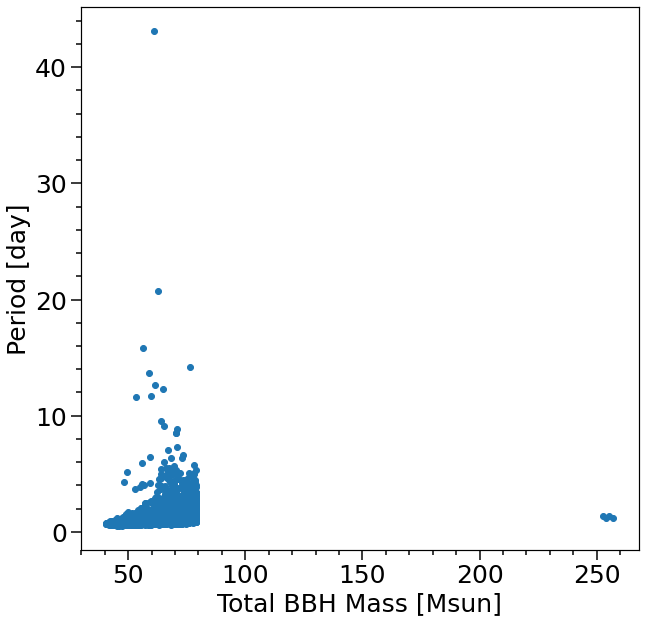

2320


In [73]:

mask_M1isNS = (M1 <= 2.5) # M1 is a NS if mass is <= 2.5 Msun 
mask_M2isNS = (M2 <= 2.5) # M2 is a NS if mass is <= 2.5 Msun 
mask_BHBH = ((mask_M1isNS==0) & (mask_M2isNS==0))  # if true then the system is a BHBH

separation =  fDCO['Separation@DCO'][...].squeeze() # in AU 
Period = separation_to_period_circular_case(separation*u.au, M1*u.M_sun, M2*u.M_sun)
# the merger time is called the "coalescence time"
coalescence_time =  fDCO['Coalescence_Time'][...].squeeze() * u.Myr # Myr 
t_Hubble = 13.7 *u.Gyr
mask_tHubble = (coalescence_time < t_Hubble)

# this is the parameter that describes the Wolf Rayet factor f_WR that was used. 
WR_Multiplier = fsys['WR_Multiplier'][...].squeeze()

# mask BBHs that merge in a Hubble time 
mask_systemsOfInterest = (mask_BHBH==1) & (mask_tHubble==1)

# add the mask of systems that are CHE. Since the CHE mask is based on systemParameters we have 
# to match the systems from systemParameters that we want to mask with the DCO systems, we can do this using the SEED
# a system in systemParameters will have the same SEED in DoubleCompactObjects, if it exists in both
mask_DCO_that_are_CHE = np.in1d(SEED_DCO, SEED_CHE) 
mask_DCO_that_are_BBH_and_CHE = (mask_DCO_that_are_CHE ==1) & (mask_systemsOfInterest==1)

# we can mask for the f_WR = 0.2 factor that is used in Figure 6 of the paper. 
mask_fWR_02 = (WR_Multiplier==0.2)
SEED_fWR_02 = SEED[mask_fWR_02]
mask_DCO_that_are_fWR_02 = np.in1d(SEED_DCO, SEED_fWR_02)

# combine all the masks above
mask_DCO_that_are_BBH_and_CHE_and_fWR_02 = (mask_DCO_that_are_CHE ==1) & (mask_systemsOfInterest==1) & (mask_DCO_that_are_fWR_02==1)


# plot the systems 
f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

plt.scatter((M1+M2)[mask_DCO_that_are_BBH_and_CHE_and_fWR_02], Period[mask_DCO_that_are_BBH_and_CHE_and_fWR_02].to(u.d))

xlabel = 'Total BBH Mass [Msun]'
ylabel = 'Period [day]'
layoutAxes(ax=ax, nameX=xlabel,nameY=ylabel)
# plt.yscale('log')        


plt.show()


print(len((M1+M2)[mask_DCO_that_are_BBH_and_CHE_and_fWR_02]))


<div class="alert alert-block alert-danger"> 

The plot above looks very similar to Figure 6, the only differences are that we did not add the Metallicity axis in this example. You can add this by using the property 'Metallicity@ZAMS_1' from the systemParameters. 
    
In addition, our Period range plotted above (the ylim) is slightly larger then the ylim range plotted in Figure 6
    
Last, the total number of events 2320 is slightly different compared to Fig 6. This is a result from a small typo/error by the auhtor in the data version that is published versus the version that was used to run this specific figure

<div class="alert alert-block alert-warning">
    
## Question 6: 
    
 - a): Try to recreeat the figure 4 in https://arxiv.org/pdf/2010.00002.pdf? 
    
    
 - b): Explain what you see 

<div class="alert alert-block alert-danger"> 

# Answer 6 
    
    
See the code below. The method is very similar to the Answer to question 5, but now we have to get the ZAMS properties through the systemParameters file. For which we have to use the np.in1d again to match the datapoints

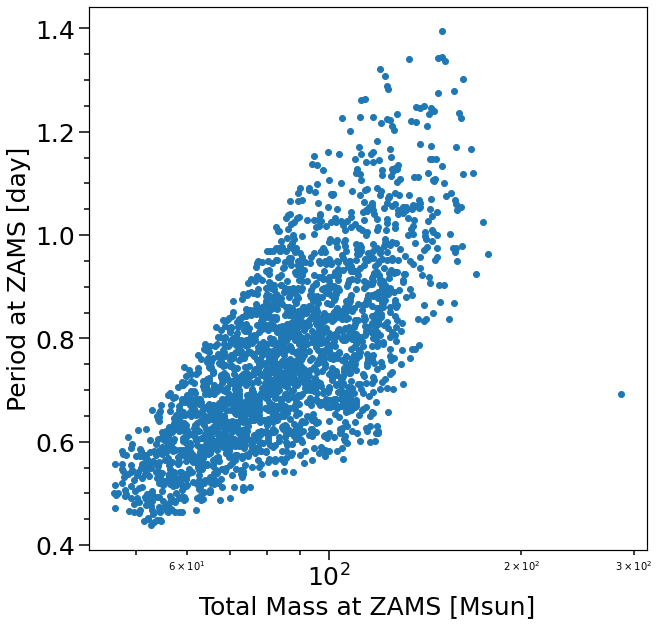

2320


In [81]:

mask_M1isNS = (M1 <= 2.5) # M1 is a NS if mass is <= 2.5 Msun 
mask_M2isNS = (M2 <= 2.5) # M2 is a NS if mass is <= 2.5 Msun 
mask_BHBH = ((mask_M1isNS==0) & (mask_M2isNS==0))  # if true then the system is a BHBH




M1ZAMS =  fsys['Mass@ZAMS_1'][...].squeeze()  # mass in Msun of the compact object resulting from the *primary star*
M2ZAMS =  fsys['Mass@ZAMS_2'][...].squeeze()  # mass in Msun of the compact object resulting from the *secondary star*


# the separation At ZAMS is given by 
separationZAMS = fsys['Separation@ZAMS'][()]
PeriodZAMS = separation_to_period_circular_case(separationZAMS*u.au, M1ZAMS*u.M_sun, M2ZAMS*u.M_sun)

# the merger time is called the "coalescence time"
coalescence_time =  fDCO['Coalescence_Time'][...].squeeze() * u.Myr # Myr 
t_Hubble = 13.7 *u.Gyr
mask_tHubble = (coalescence_time < t_Hubble)

# this is the parameter that describes the Wolf Rayet factor f_WR that was used. 
WR_Multiplier = fsys['WR_Multiplier'][...].squeeze()

# mask BBHs that merge in a Hubble time 
mask_systemsOfInterest = (mask_BHBH==1) & (mask_tHubble==1)

# add the mask of systems that are CHE. Since the CHE mask is based on systemParameters we have 
# to match the systems from systemParameters that we want to mask with the DCO systems, we can do this using the SEED
# a system in systemParameters will have the same SEED in DoubleCompactObjects, if it exists in both
mask_DCO_that_are_CHE = np.in1d(SEED_DCO, SEED_CHE) 
mask_DCO_that_are_BBH_and_CHE = (mask_DCO_that_are_CHE ==1) & (mask_systemsOfInterest==1)

# we can mask for the f_WR = 1 factor that is used in Figure 4 of the paper. 
mask_fWR_1 = (WR_Multiplier==1)
SEED_fWR_1 = SEED[mask_fWR_1]
mask_DCO_that_are_fWR_1 = np.in1d(SEED_DCO, SEED_fWR_1)

# combine all the masks above
mask_DCO_that_are_BBH_and_CHE_and_fWR_1 = (mask_DCO_that_are_CHE ==1) & (mask_systemsOfInterest==1) & (mask_DCO_that_are_fWR_1==1)

mask_Fig4 = np.in1d(SEED, SEED_DCO[mask_DCO_that_are_BBH_and_CHE_and_fWR_1])




# plot the systems 
f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

plt.scatter((M1ZAMS+M2ZAMS)[mask_Fig4], PeriodZAMS[mask_Fig4].to(u.d))

xlabel = 'Total Mass at ZAMS [Msun]'
ylabel = 'Period at ZAMS [day]'
layoutAxes(ax=ax, nameX=xlabel,nameY=ylabel)
plt.xscale('log')        


plt.show()


print(len((M1+M2)[mask_DCO_that_are_BBH_and_CHE_and_fWR_02]))


<div class="alert alert-block alert-warning">

    
For the last part of this excersize we will use the code 'FastCosmicIntegrator'. Our goal will be to calculate the merger rate for BBHs, so that we can compare to the analytical estimate we made earlier on.    

## Question 7: 
    


In [87]:
fdata.close()

<div class="alert alert-block alert-warning">

    
   

## EXTRA using the CHE data: 
    
If there is time left, try to plot some other BBH or ZAMS properties of the BBH, (or NSBH or BNS), examples include chirp mass, mass ratio, individual masses. How do these compare with LIGOs observations (paper is attached to this directory)


In [86]:
!FastCosmicIntegration

/bin/sh: FastCosmicIntegration: command not found


 <div class="alert alert-block alert-info">
 
 # Extra material:

[//]: ## (grip -b README.md)



# Compact Object Mergers: Population Astrophysics & Statistics

[![Documentation](https://img.shields.io/badge/Documentation-latest-orange.svg?style=flat)](https://github.com/TeamCOMPAS/COMPAS/blob/Documentation/COMPAS_Documentation.pdf)

[//]: ## (Outline features)
COMPAS is a publicly available rapid binary population synthesis code (https://compas.science/) that is designed so that evolution prescriptions and model parameters are easily 
adjustable.  COMPAS draws properties for a binary star system from a set of initial distributions, and evolves it from zero-age main sequence to the end of its life as two compact 
remnants.  It has been used for inference from observations of gravitational-wave mergers, Galactic neutron stars, X-ray binaries, and luminous red novae.

## Documentation
https://compas.science/docs

## Contact
Please email your queries to compas-user@googlegroups.com. You are also welcome to join the [COMPAS User Google Group](https://groups.google.com/forum/#!members/compas-user) to engage in discussions with COMPAS users and developers.






## Example of additional excersizes

If you are interested, you can download the COMPAS code from Github and do any of the following excersizes: 


1). Try to run any of the demos that are provided (I recommend the Chirp mass distribution demo, and/or the detailed evolution demo)

2.) Try to use the code, and the data above, to plot a detailed evolution plot of a CHE BBH. 

3.) Run a larger COMPAS simulation with your own favorite settings, compare this to the data given in this demo. 







